In [ ]:
!pip install pandas numpy matplotlib tensorflow


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")

# EMA hesaplama fonksiyonu
def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

# RSI hesaplama fonksiyonu
def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# EMA ve RSI kolonlarını ekle
window_size = 10
data['EMA'] = calculate_ema(data['close'], period=window_size)
data['RSI'] = calculate_rsi(data['close'], period=window_size)

# Hedef değişkeni rastgele oluştur
data['target'] = np.random.choice([-1, 0, 1], size=len(data))

# NaN değerlerini temizle
data.dropna(inplace=True)

# LSTM için veri hazırlığı
sequence_length = 20
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[['EMA', 'RSI']].values[i:i+sequence_length])
    y.append(data['target'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modeli oluştur
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 2)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# X_train ve X_test'i LSTM girişine uygun şekilde yeniden boyutlandır
X_train = X_train.reshape(X_train.shape[0], sequence_length, 2)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 2)

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Test seti üzerinde modeli değerlendir
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Doğruluk oranını yazdır
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Hata matrisini oluştur ve göster
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
629/629 [==============================] - 27s 33ms/step - loss: 0.0206 - accuracy: 0.3356
Epoch 2/10
629/629 [==============================] - 19s 30ms/step - loss: 0.0188 - accuracy: 0.3356
Epoch 3/10
629/629 [==============================] - 19s 31ms/step - loss: 0.0184 - accuracy: 0.3356
Epoch 4/10
629/629 [==============================] - 20s 33ms/step - loss: 0.0170 - accuracy: 0.3356
Epoch 5/10
629/629 [==============================] - 19s 30ms/step - loss: 0.0161 - accuracy: 0.3356
Epoch 6/10
629/629 [==============================] - 18s 29ms/step - loss: 0.0150 - accuracy: 0.3356
Epoch 7/10
629/629 [==============================] - 17s 27ms/step - loss: 0.0170 - accuracy: 0.3356
Epoch 8/10
629/629 [==============================] - 17s 27ms/step - loss: 0.0157 - accuracy: 0.3356
Epoch 9/10
629/629 [==============================] - 17s 27ms/step - loss: 0.0165 - accuracy: 0.3356
Epoch 10/10
315/315 [==============================] - 4s 8ms/step
Accuracy: 0.332

<Figure size 800x800 with 0 Axes>

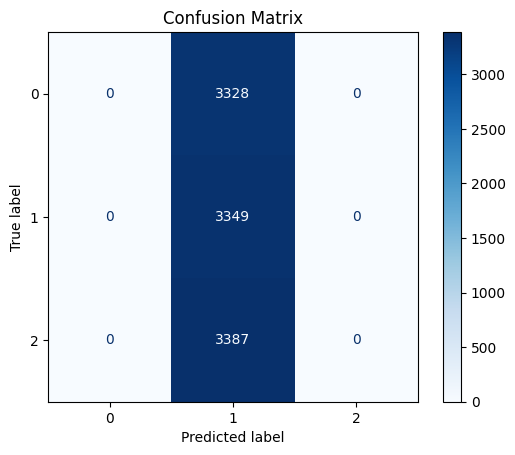

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")

# EMA ve RSI hesaplama fonksiyonları
def calculate_ema(prices, period):
    return prices.ewm(span=period, adjust=False).mean()

def calculate_rsi(data, period=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# EMA ve RSI kolonlarını ekle
window_size = 10
data['EMA'] = calculate_ema(data['close'], period=window_size)
data['RSI'] = calculate_rsi(data['close'], period=window_size)

# Hedef değişkeni rastgele oluştur
data['target'] = np.random.choice([-1, 0, 1], size=len(data))

# NaN değerlerini temizle
data.dropna(inplace=True)

# LSTM için veri hazırlığı
sequence_length = 20
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data[['EMA', 'RSI']].values[i:i+sequence_length])
    y.append(data['target'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modeli oluştur
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 2)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# X_train ve X_test'i LSTM girişine uygun şekilde yeniden boyutlandır
X_train = X_train.reshape(X_train.shape[0], sequence_length, 2)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 2)

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Test seti üzerinde modeli değerlendir
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

# Doğruluk oranını yazdır
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Hata matrisini oluştur ve göster
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


Epoch 1/10
629/629 [==============================] - 22s 27ms/step - loss: 0.6660
Epoch 2/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6648
Epoch 3/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6647
Epoch 4/10
629/629 [==============================] - 20s 32ms/step - loss: 0.6647
Epoch 5/10
629/629 [==============================] - 21s 33ms/step - loss: 0.6646
Epoch 6/10
629/629 [==============================] - 19s 30ms/step - loss: 0.6645
Epoch 7/10
629/629 [==============================] - 19s 30ms/step - loss: 0.6646
Epoch 8/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6646
Epoch 9/10
629/629 [==============================] - 19s 30ms/step - loss: 0.6645
Epoch 10/10
315/315 [==============================] - 4s 9ms/step


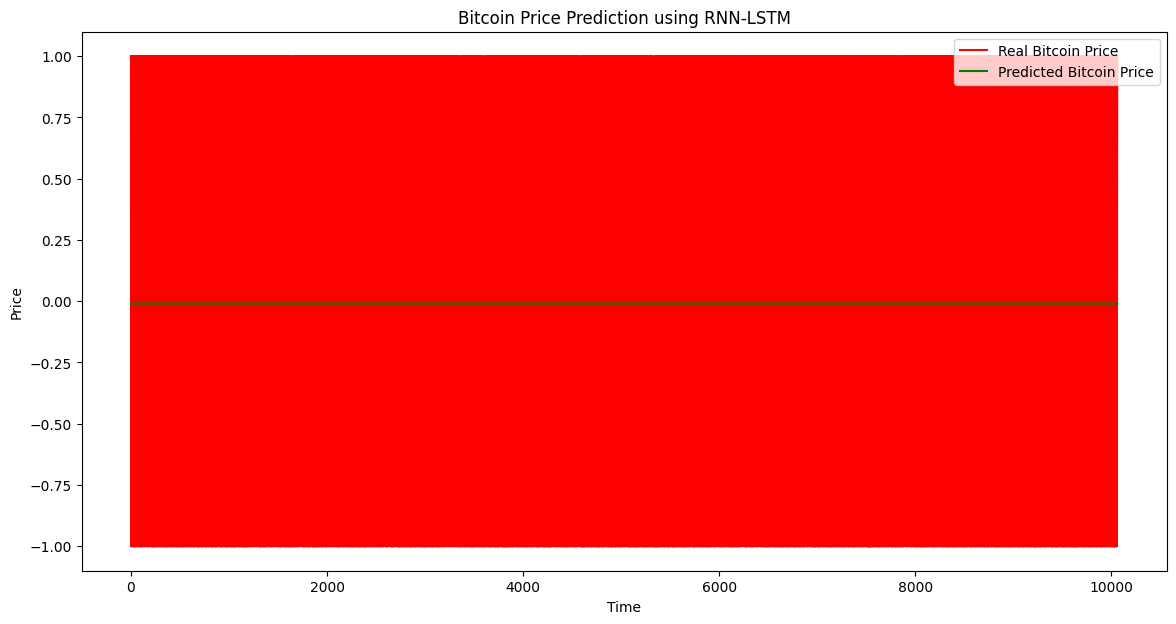

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")

# ... [Rest of your code for preparing the data and defining the functions] ...

# LSTM modeli oluştur
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 2)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1)  # Remove the activation function for regression
])

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')  # Use MSE for regression

# X_train ve X_test'i LSTM girişine uygun şekilde yeniden boyutlandır
X_train = X_train.reshape(X_train.shape[0], sequence_length, 2)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 2)

# Modeli eğit
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Test seti üzerinde modeli değerlendir
predicted_prices = model.predict(X_test)
real_prices = y_test  # Assuming y_test contains the real prices

# Plot the real vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(real_prices, color='red', label='Real Bitcoin Price')
plt.plot(predicted_prices, color='green', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/10
629/629 [==============================] - 25s 28ms/step - loss: 0.6660
Epoch 2/10
629/629 [==============================] - 18s 28ms/step - loss: 0.6648
Epoch 3/10
629/629 [==============================] - 20s 33ms/step - loss: 0.6646
Epoch 4/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6646
Epoch 5/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6646
Epoch 6/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6645
Epoch 7/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6646
Epoch 8/10
629/629 [==============================] - 18s 29ms/step - loss: 0.6645
Epoch 9/10
629/629 [==============================] - 18s 28ms/step - loss: 0.6645
Epoch 10/10
315/315 [==============================] - 4s 10ms/step


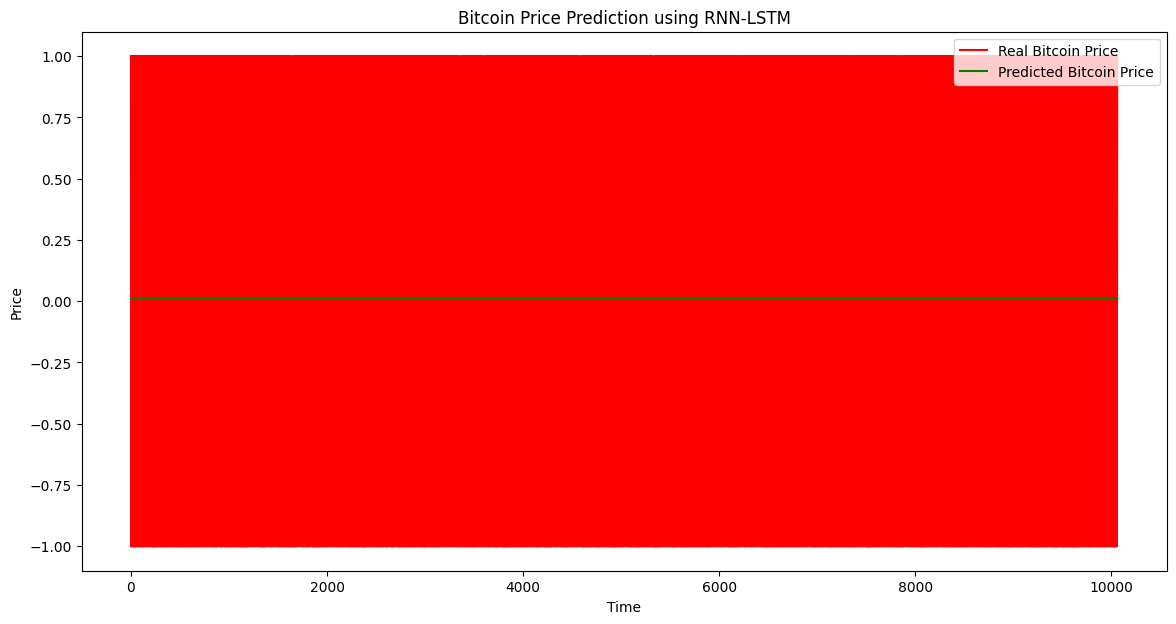

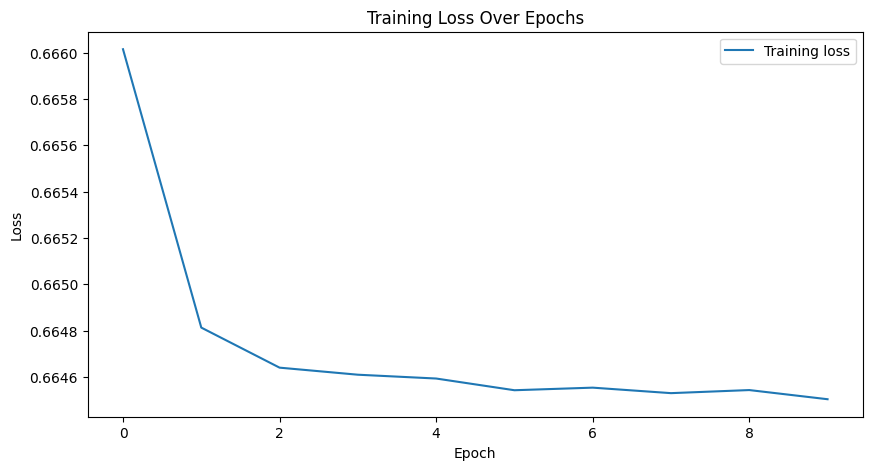

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")

# ... [Your code for preparing the data and defining the functions] ...

# Assuming that the 'close' column has the Bitcoin prices.
# You might need to adjust the 'y' array creation to match this column, like this:
# y = data['close'].values[sequence_length:]

# Rest of your data preparation code...
# X_train, X_test, y_train, y_test creation...

# LSTM modeli oluştur
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 2)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1)  # Remove the activation function for regression
])

# Modeli derle
model.compile(optimizer='adam', loss='mean_squared_error')  # Use MSE for regression

# X_train ve X_test'i LSTM girişine uygun şekilde yeniden boyutlandır
X_train = X_train.reshape(X_train.shape[0], sequence_length, 2)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 2)

# Modeli eğit
history = model.fit(X_train, y_train, epochs=10, batch_size=64)

# Test seti üzerinde modeli değerlendir
predicted_prices = model.predict(X_test)

# If the data was scaled, apply inverse transformation to both real and predicted prices
# real_prices = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
# predicted_prices = scaler.inverse_transform(predicted_prices).flatten()

# Plot the real vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(real_prices, color='red', label='Real Bitcoin Price')  # Ensure real_prices is correct
plt.plot(predicted_prices, color='green', label='Predicted Bitcoin Price')  # Ensure predicted_prices is correct
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Additionally, you might want to plot the loss over epochs to check for convergence
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Charger les données de prix du Bitcoin à partir d'un fichier CSV
data = pd.read_csv("/content/BTC-2017min.csv")

# Calculer une moyenne mobile simple (MMS) pour une taille de fenêtre donnée.
# La MMS est la moyenne des prix de fermeture sur un nombre spécifié de jours précédents.
window_size = 10
data['SMA'] = data['close'].rolling(window=window_size).mean()

# Créer une variable cible. Ici, on utilise un choix aléatoire entre -1, 0, 1,
# représentant respectivement vendre, maintenir et acheter.
# Cette approche est simpliste et à titre d'exemple uniquement.
data['target'] = np.random.choice([-1, 0, 1], size=len(data))

# Éliminer les lignes avec des valeurs manquantes, qui résultent du calcul de la MMS.
data.dropna(inplace=True)

# Préparer les données séquentielles pour LSTM (Long Short-Term Memory).
# LSTM est un type de réseau de neurones récurrent, utile pour apprendre des séquences de données.
sequence_length = 20
X, y = [], []
for i in range(len(data) - sequence_length):
    X.append(data['SMA'].values[i:i+sequence_length])
    y.append(data['target'].values[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle LSTM plus profond avec plusieurs couches.
# Chaque couche LSTM peut apprendre des aspects différents de la séquence de données.
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(1, activation='sigmoid')
])

# Compiler le modèle avec l'optimiseur 'adam' et une fonction de perte 'binary_crossentropy',
# adaptée pour des problèmes de classification binaire.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Redimensionner X_train et X_test pour l'entrée LSTM (nombre d'échantillons, longueur de la séquence, nombre de caractéristiques).
X_train = X_train.reshape(X_train.shape[0], sequence_length, 1)
X_test = X_test.reshape(X_test.shape[0], sequence_length, 1)

# Entraîner le modèle sur les données d'entraînement.
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Évaluer la performance du modèle sur l'ensemble de test.
# On convertit les prédictions en 1 ou 0 (acheter/vendre) basé sur un seuil de 0.5.
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Précision : {accuracy}")

# Générer et afficher la matrice de confusion pour visualiser la performance du modèle.
# La matrice de confusion montre les prédictions correctes et incorrectes en termes de classes réelles et prédites.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(8, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.show()


ParserError: Error tokenizing data. C error: Expected 9 fields in line 10046, saw 14


Epoch 1/10
5913/5913 [==============================] - 136s 23ms/step - loss: 1.0647e-04 - val_loss: 1.4574e-06
Epoch 2/10
5913/5913 [==============================] - 135s 23ms/step - loss: 2.6818e-06 - val_loss: 2.0881e-06
Epoch 3/10
5913/5913 [==============================] - 134s 23ms/step - loss: 1.5912e-06 - val_loss: 8.5342e-07
Epoch 4/10
5913/5913 [==============================] - 136s 23ms/step - loss: 1.2395e-06 - val_loss: 7.3473e-07
Epoch 5/10
5913/5913 [==============================] - 134s 23ms/step - loss: 1.0434e-06 - val_loss: 5.7691e-07
Epoch 6/10
5913/5913 [==============================] - 136s 23ms/step - loss: 9.8340e-07 - val_loss: 8.7819e-07
Epoch 7/10
5913/5913 [==============================] - 135s 23ms/step - loss: 9.6306e-07 - val_loss: 7.9688e-07
Epoch 8/10
5913/5913 [==============================] - 134s 23ms/step - loss: 8.5424e-07 - val_loss: 2.1975e-06
Epoch 9/10
5913/5913 [==============================] - 136s 23ms/step - loss: 8.7985e-07 - val_

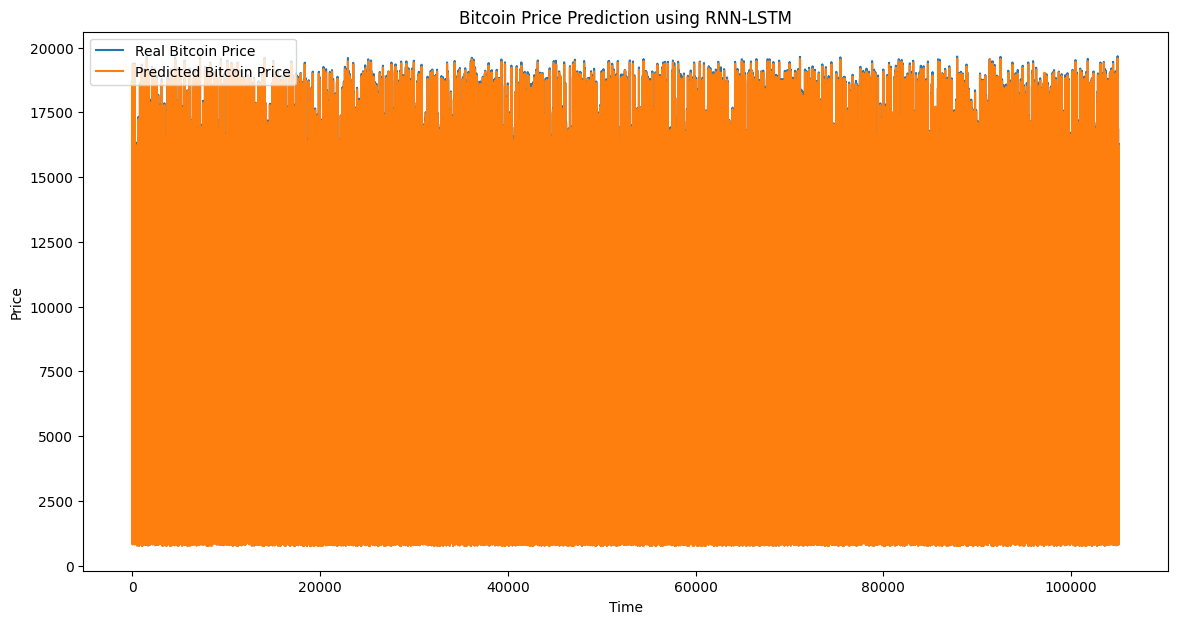

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")
prices = data['close'].values.reshape(-1, 1)  # Adjust based on your data structure

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Prepare the sequences
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(prices_scaled)):
    X.append(prices_scaled[i-sequence_length:i])
    y.append(prices_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Single feature input

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 7))
plt.plot(real_prices, label='Real Bitcoin Price')
plt.plot(predicted_prices, label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/20
11825/11825 [==============================] - 448s 38ms/step - loss: 4.5472e-05 - val_loss: 3.0546e-06
Epoch 2/20
11825/11825 [==============================] - 437s 37ms/step - loss: 3.5989e-06 - val_loss: 3.0229e-06
Epoch 3/20
11825/11825 [==============================] - 439s 37ms/step - loss: 2.5391e-06 - val_loss: 2.0217e-06
Epoch 4/20
11825/11825 [==============================] - 439s 37ms/step - loss: 2.0100e-06 - val_loss: 2.5362e-06
Epoch 5/20
11825/11825 [==============================] - 429s 36ms/step - loss: 1.7520e-06 - val_loss: 2.1489e-06
Epoch 6/20
11825/11825 [==============================] - 437s 37ms/step - loss: 1.6300e-06 - val_loss: 4.8962e-07
Epoch 7/20
11825/11825 [==============================] - 438s 37ms/step - loss: 1.5139e-06 - val_loss: 8.0749e-07
Epoch 8/20
11825/11825 [==============================] - 437s 37ms/step - loss: 1.5028e-06 - val_loss: 9.1633e-07
Epoch 9/20
11825/11825 [==============================] - 434s 37ms/step - loss:

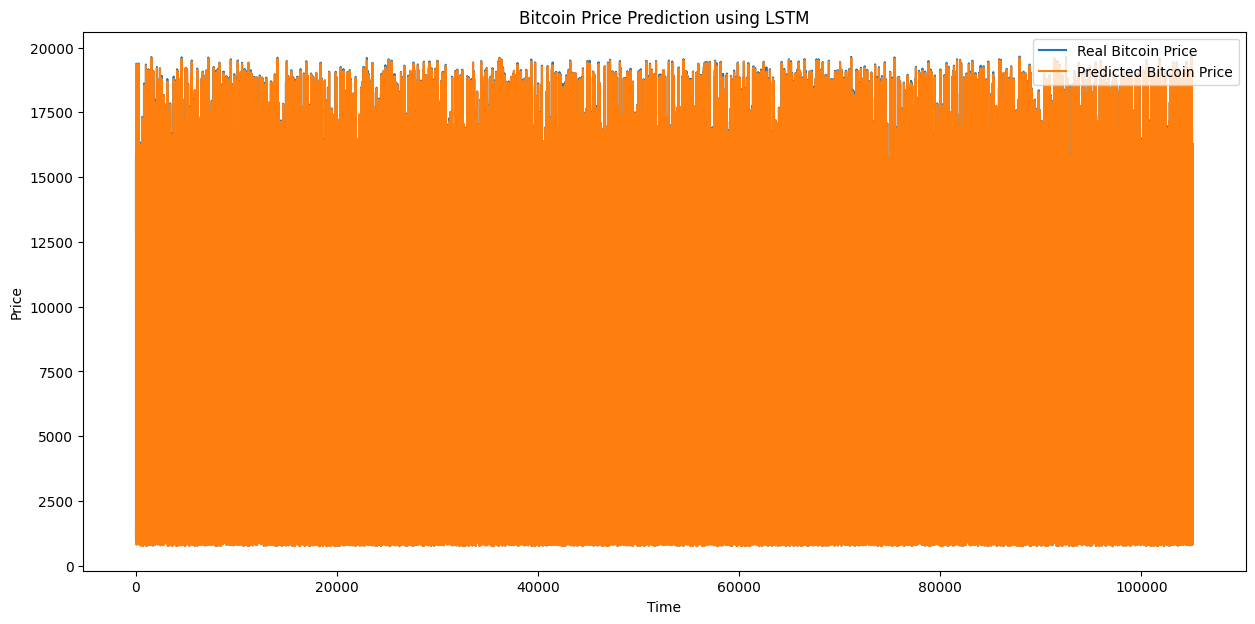

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")  # Dosya yolu güncelleyin
prices = data['close'].values.reshape(-1, 1)  # 'close' sütunu veri setinize bağlı olarak değişebilir

# Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Veri dizilerini hazırla
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(prices_scaled)):
    X.append(prices_scaled[i-sequence_length:i, 0])
    y.append(prices_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Verileri böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modelini oluştur
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Modeli eğit
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Tahmin yap
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Sonuçları çizdir
plt.figure(figsize=(15, 7))
plt.plot(real_prices, label='Real Bitcoin Price')
plt.plot(predicted_prices, label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Verileri yükle
data = pd.read_csv("/content/BTC-2017min.csv")
prices = data['close'].values.reshape(-1, 1)

# Verileri ölçeklendir
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

# Veri dizilerini hazırla
sequence_length = 50
X, y = [], []
for i in range(sequence_length, len(prices_scaled)):
    X.append(prices_scaled[i-sequence_length:i, 0])
    y.append(prices_scaled[i, 0])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Tek öznitelik

# Verileri böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM modelini oluştur
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Modeli eğit
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Tahmin yap
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Sonuçları çizdir
plt.figure(figsize=(15, 7))
plt.plot(real_prices, label='Real Bitcoin Price')
plt.plot(predicted_prices, label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Epoch 1/50
13139/13139 [==============================] - 527s 40ms/step - loss: 3.4612e-05 - val_loss: 1.1007e-05
Epoch 2/50
13139/13139 [==============================] - 518s 39ms/step - loss: 3.4344e-06 - val_loss: 5.3912e-07
Epoch 3/50
13139/13139 [==============================] - 519s 39ms/step - loss: 2.3589e-06 - val_loss: 1.5056e-06
Epoch 4/50
13139/13139 [==============================] - 516s 39ms/step - loss: 1.8634e-06 - val_loss: 8.1772e-07
Epoch 5/50
13139/13139 [==============================] - 517s 39ms/step - loss: 1.7029e-06 - val_loss: 5.0090e-07
Epoch 6/50
13139/13139 [==============================] - 519s 40ms/step - loss: 1.5364e-06 - val_loss: 1.4742e-06
Epoch 7/50
13139/13139 [==============================] - 515s 39ms/step - loss: 1.4763e-06 - val_loss: 1.2273e-06
Epoch 8/50
 4631/13139 [=========>....................] - ETA: 5:05 - loss: 1.3600e-06